* 딥러닝 : 층이 깊은 인공신경망을 사용하는 기계학습 알고리즘
 (인공신경망 = 뇌) 노드가 뉴런과 같은 역할을 한다. 여러 노드에서 값을 받아 가중합을 계산하고 활성화 함수를 적용해서 값을 변환한 후
 다음 노드로 전달한다. 가중합은 가중치를 사용하는데 이 가중치는 학습을 통해 결정된다. 정확도를 높이는 방법으로 가중치들을 조절한다.
 출력층은 목표에 따라 달라진다.하나의 수치를 예측하거나 이항 분류를 하고 싶다면 하나의 노드로 구성하고, 
 다중 분류를 하고 싶다면 클래스의 수만큼의 노드로 구성한다.
 은닉층을 늘리면서 얻을 수 있는 장점은 입력변수와 출력변수 간의 함수를 단순한 선형식, 즉 직선이 아니라 매우 복잡한 형태의 곡선으로 
 만들 수 있다는 것이다. 
 은닉층이 많으면 결정적으로 학습이 잘 이뤄지지 않는다. 은닉층이 여러 개 사용될 때 경사하강법은 출력에 가까운 층부터 입력층 방향으로
 단계적으로 이루어지는데, 이를 역전파라고 한다.
 역전파 과정에서 점차 기울기가 사라져서 학습이 전혀 이뤄지지 않는다. 이를 경사소실 문제라고 한다.
 이 문제를 해결하기 위해 RBM과 같은 사전학습을 통해 먼저 가중치들을 단계별로 학습시키거나, 시그모이드 함수 대신 ReLU와 같이 계산량이
 적고, 경사소실이 없는 활성화 함수를 개발한다.

* 인공신경망에서의 학습
 인공신경망은 입력값들에 대해 목표 출력값 혹은 실제 출력값을 매칭시킨 학습자료를 이용해서, 주어진 입력값에 대해 매칭되는 출력값을 예측할
 수 있도록 가중치를 조정하는 지도학습을 사용한다.

* 손실 함수의 이해
 손실 함수는 현재 예측한 출력값 집합과 실제 출력값 집합 사이에 얼마나 오차가 있는지를 하나의 값으로 나타내는 함수로 설명할 수 있다.
 학습의 목표는 가중치를 조정해서 손실 함수의 값을 최소화하는 것이다.
 가장 기초적인 손실 함수는 MSE(평균 제곱오차:예측값과 실제값의 차이를 제곱해 평균으로 계산)로 양의 오차와 음의 오차가 서로 상쇄되는 것을
 막기 위해서이다.

* 경사 하강법
 손실 함수를 최소화하는 w값(최적의 가중치)을 찾아나가기 위한 방법론

* RNN은 문장을 이해하기 위해 단어의 순서를 고려하는 가장 직관적인 모형
 RNN(순환신경망)은 시계열 데이터를 다루기 위한 모형.
 RNN이 문서 분류에 적합한 이유
 앞에서부터 순차적으로 미치는 영향을 계속 축적하는 모형이다.

* 일반적으로 범주형 데이터를 수치로 변환하는 방법은 더미 변수의 이용과 임베딩이 있다. 
 더미 변수는 0과 1만으로 범주형 데이터를 표현한다.
 임베딩은 범주형 데이터를 연속적인 값을 갖는, 상대적으로 작은 크기의 벡터로 변환하는 작업을 의미한다.
 워드 임베딩(밀집 벡터  <-> 희소 벡터)
 딥러닝에서는 기본적으로 문서를 단어의 시퀀스로 표현하고, 각 단어들은 고정된 길이의 벡터가 되어야 한다. 그래야 처리가 가능하다.
 이러한 과정을 워드 임베딩이라고 한다. 
 워드 임베딩은 보통 단어에 대해 원핫 인코딩을 먼저 수행하고 이를 다시 연속형 값을 갖는 축소된 벡터로 변환하는 과정

* 임베딩을 하는 이유 
 첫째, 차원이 큰 원핫 벡터를 그대로 쓰면 연산이 비효율적이다.
 둘째, 대상 간의 의미적 유사도를 계산할 수 있다.
 셋째, 단어가 의미적인 정보를 함축함으로써 연산이 가능해질 수 있다.
 넷째, 전이학습을 가능하게 한다. 전이학습은 기존에 학습된 모형을 새로운 환경에서 재사용함으로써 학습의 속도와 효과를 높이는 방법이다.
 임베딩은 원핫 인코딩에 의한 희소 벡터를 축소된 밀집 벡터로 변환하는 과정

In [2]:
# RNN을 이용한 문서 분류 - NLTK 영화 리뷰 감성분석
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() # 영화 리뷰 데이터에서 파일 id를 가져옴

# 파일 id를 이용해 raw 텍스트 파일을 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids]

# 파일 id를 이용해 라벨로 사용할 카테고리, 즉 긍정/부정 정보를 순서대로 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

print('Review count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:',set(categories))

Review count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000 # 사용할 단어 수

# 빈도가 높은 10000개의 단어를 선택하도록 객체 생성
tokenizer = Tokenizer(num_words = max_words, oov_token='UNK')

tokenizer.fit_on_texts(reviews) # 단어 인덱스 구축

# 만들어진 단어 인덱스를 이용해 문서들을 변환
X = tokenizer.texts_to_sequences(reviews)

print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [4]:
import numpy as np
print("Index of 'the':", tokenizer.word_index["the"])
print("Index of 'review':", tokenizer.word_index["review"])
print("Index of out-of-vocabulary words:", tokenizer.word_index["UNK"])

Index of 'the': 2
Index of 'review': 466
Index of out-of-vocabulary words: 1


In [5]:
# 신경망의 모형의 입력은 길이가 일정해야 하므로, pad_sequences()를 이용해 모든 입력 시퀀스의 길이를 매개변수maxlen의 인수만큼 동일하게
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=500 # 문서의 단어 수를 제한

# 문서의 단어 수가 500보다 작으면 0을 채우고, 크면 잘라냄
# 잘라낼 때, 앞을 자를 지, 뒤를 자를 지 선택할 수 있음.
# 앞을 자르고 뒷부분을 쓰고자 하면 'pre' 선택
X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [6]:
import numpy as np

# label을 0, 1의 값으로 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


In [ ]:
# RNN이 아닌 일반적인 신경망 모형을 이용한 분류
# 임베딩 레이어, Flatten() 레이어, Dense() 레이어
# 임베딩 레이어는 RNN을 위해 만든 입력을 받아서 원핫 인코딩과 워드 임베딩을 수행하는 레이어이다.
# 워드 임베딩은 2차원 행렬(단어수, 밀집 벡터의 크기)로 원핫 인코딩된 단어들을 일정한 크기의 밀집 벡터로 변환한다.
# Flatten() 레이어는 2차원 행렬의 형태로 된 값을 펼쳐서 1차원 벡터로 변환한다.
# 마지막 Dense() 레이어는 우리가 일반적인 신경망의 은닉층으로 알고 있는, 모든 노드들이 연결되는 밀집 층을 생성한다.

In [8]:
# 케라스 모형 생성 및 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

# 순차적 모형
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    # word embedding layer 생성
    # max_words는 one-hot encoding을 할 때의 vector 크기가 됨 - 사용된 단어의 수 만큼
    # 각 단어는 32 크기의 dense vector로 임베딩됨
    # input_length는 한 document의 단어 수로 표현
    # 이 과정을 거치면 각 document는 (maxlen, 32)의 2차원 행렬이 됨
    Flatten(), # 2차원 행렬을 1차원으로 펼침
    Dense(1,activation='sigmoid') # binary logistic regression을 수행
])

model.summary() # 모델의 요약정보 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 모형의 optimizer와 loss function 등을 지정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# 학습을 수행
history = model.fit(X_train, y_train,
                   epochs=10, # 학습의 반복수
                   verbose=1, # 학습현황의 출력 여부
                   validation_split=0.2) # 검증 데이터셋 비율 지정

Epoch 1/10
40/40 [==============================] - 2s 14ms/step - loss: 0.6928 - acc: 0.5125 - val_loss: 0.6892 - val_acc: 0.4875
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6171 - acc: 0.8594 - val_loss: 0.6839 - val_acc: 0.5250
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5167 - acc: 0.9609 - val_loss: 0.6730 - val_acc: 0.5719
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.3875 - acc: 0.9867 - val_loss: 0.6566 - val_acc: 0.6031
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2590 - acc: 0.9953 - val_loss: 0.6385 - val_acc: 0.6156
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.1566 - acc: 0.9984 - val_loss: 0.6307 - val_acc: 0.6375
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0890 - acc: 0.9992 - val_loss: 0.6221 - val_acc: 0.6531
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 0.0485 - acc: 1.0

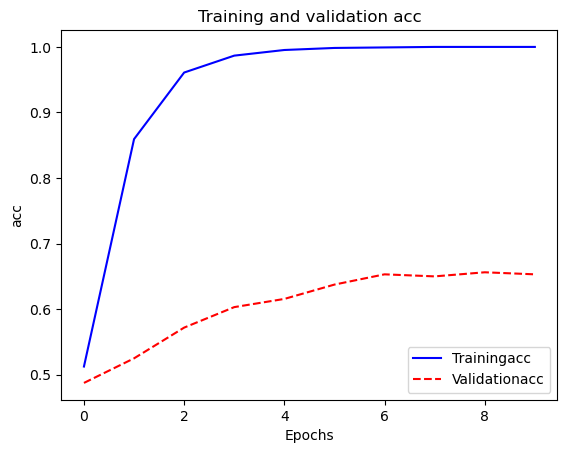

In [10]:
# 학습 데이터셋에 대한 정확도는 에포크4 정도에서 이미 최대치에 도달, 검증 데이터셋에 대한 정확도는 4 이후에도 조금씩 향상되지만 진전x
# 둘의 정확도 격차가 꽤 큰 편이어서 과대적합의 가능성이 있어 보인다.
# 마지막으로 데스트 데이터셋에 대한 모형의 최종 성능을 평가해본다

%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training' + metric)
    plt.plot(history.history['val_'+ metric], 'r--', label='Validation' + metric)
    plt.title('Training and validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
   
plot_results(history, 'acc')

In [11]:
# 65.2%로 BOW 기반의 로지스틱 회귀분석이 보인 85.5%에 비해 많이 낮다. 
# 원인을 단어를 500개로 제한하면서 문서가 잘려 나간 것, 검증 데이터셋으로 학습 데이터셋의 20%가 학습에 사용되지 못한 것, 과대적합,
# 단어 순서 정보가 사라진 것 등등 

# 테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 2ms/step - loss: 0.6223 - acc: 0.6525
#Test accuracy:0.652


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323169 (1.23 MB)
Trainable params: 323169 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


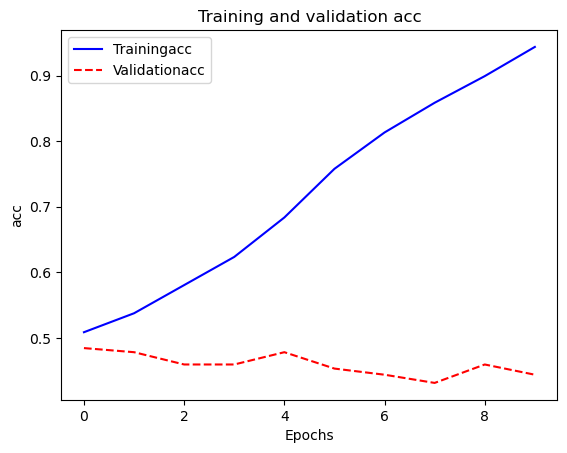

13/13 [==============================] - 1s 17ms/step - loss: 0.7205 - acc: 0.5000
#Test accuracy:0.500


In [12]:
# 문서의 순서정보를 활요하는 RNN 기반 문서분류
# SimpleRNN()레이어 추가
# 인수는 32인데, 이것은 은닉 노드의 크기이다. 다른 값을 사용해도 상관없다.

# 과대적합만 이뤄지고 있다. 
# 가장 중요한 원인인 경사소실(층이 깊어지면서 역전파과정에서 가중치를 수정하려는 기울기가 중간에 0이 되어버리거나 0에 매우 가깝게 
# 작아지는 문제)
# RNN의 목적은 앞에서부터 순서에 따라 다음 단어에 미치는 영향을 축적하는 것인데. 이억시 경사소실 문제로 인해 학습이 잘 되지 못한다.
# 따라서 우리가 원하는 정보에 제대로 축적되지 못한 것이다.
# 이러한 현상을 장기간에 걸친 시간의존성이 학습되지 못하는 현상이라고 한다
# 이를 해결하기 위해 제안된 모형이 바로 LSTM이다.
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, 32),
    
    # 펼쳐서 flat하게 만드는 대신 RNN 모형을 사용, maxlen만큼의 시계열 데이터
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                   epochs=10,
                   verbose=0,
                   validation_split=0.2)
plot_results(history, 'acc')

# 테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 714369 (2.73 MB)
Trainable params: 714369 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


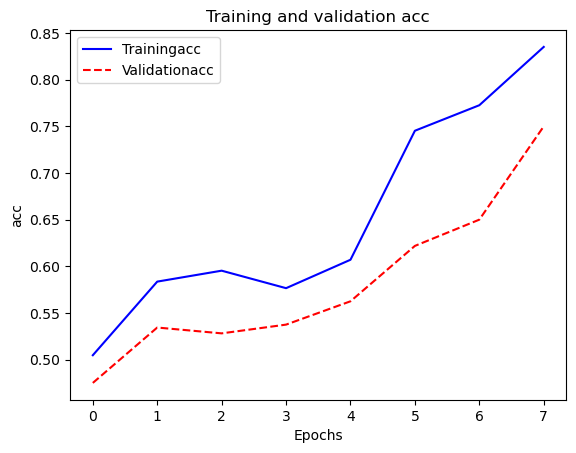

13/13 [==============================] - 2s 64ms/step - loss: 0.5508 - acc: 0.7550
#Test accuracy:0.755


In [16]:
# LSTM, Bi-LSTM과 GPU를 이용한 성능 개선
# LSTM의 목적은 앞부분의 정보가 뒤로 갈수록 소실되는 것을 방지하기 위해 장기의존성과 단기의존성을 모두 표현하고 학습하는 것이다.
# GPU는 LSTM을 간소화한 모형으로 LSTM에 비해 계산량이 적고 속도가 빠르면서도 좋은 성능을 내는 것
# 양뱡향으로 모형을 구축하는 것. (Bi-LSTM)

# 75.5% 전(SimpleRNN, 순서에 대한 정보 없이 학습)보다 좋은 성능을 보여줬지만 나이브 베이즈(79.7%)에 미치지 못한다.
# 우선 딥러닝은 로지스틱 회귀분석이나 나이브 베이즈와 같ㅇ은 방법에 비해 더욱 많은 데이터를 요구한다.
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(max_words,64),
    Bidirectional(LSTM(64)), # simple RNN 대신 bidirectional LSTM을 사용
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                   epochs=8,
                   verbose=0,
                   validation_split=0.2)
plot_results(history, 'acc')

# 테스트 셋으로 학습된 모형의 성능을 평가
score= model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

In [17]:
# 임계값을 설정해서 그 값보다 크면 1, 작으면 0으로 변환한다

y_pred = np.round(model.predict(X_test[:10]))
for pred, y_t in zip(y_pred, y_test[:10]):
    print(
        f'predicted value: {pred[0]}, true value:{y_t}, so the prediction is {pred[0]==y_t}')

1/1 [==============================] - 1s 1s/step
predicted value: 1.0, true value:0, so the prediction is False
predicted value: 1.0, true value:1, so the prediction is True
predicted value: 1.0, true value:1, so the prediction is True
predicted value: 1.0, true value:0, so the prediction is False
predicted value: 1.0, true value:1, so the prediction is True
predicted value: 1.0, true value:1, so the prediction is True
predicted value: 0.0, true value:0, so the prediction is True
predicted value: 1.0, true value:0, so the prediction is False
predicted value: 0.0, true value:0, so the prediction is True
predicted value: 0.0, true value:0, so the prediction is True
